In [1]:
import delimited "/Users/santerivaataja/Desktop/Taloustieteen_kursseja/Econometrics/Capstone.nosync/Econometrics-Capstone/raw_data/small_master_c.csv", clear

(92 vars, 132 obs)


In [2]:
set scheme s1mono

In [3]:
qui {
    gen ln_gdp = ln(gdp)
    
    xtset countrycode year
    egen civilsocietytraditions_mean = mean(civilsocietytraditions)
    gen civilsocietytraditions_c = civilsocietytraditions - civilsocietytraditions_mean
    sort country year
    bysort country: gen changeindemocracy = democracy[2] - democracy[1]
}

(bin=3, start=-1, width=.66666667)


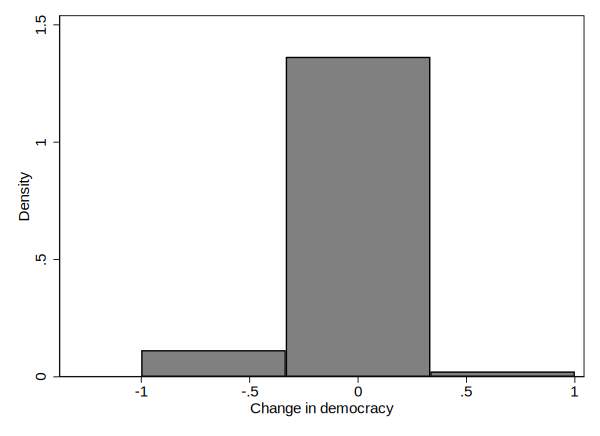

In [4]:
hist changeindemocracy, bin(3) xtitle("Change in democracy")

In [5]:
graph export "saved_outputs/changeindemocracy.pdf", replace

(file saved_outputs/changeindemocracy.pdf written in PDF format)


In [17]:
eststo: xtreg ln_gdp democracy civilsocietytraditions, fe vce(cluster continentcat)
eststo: xtreg ln_gdp democracy civilsocietytraditions rol life_expectancy, fe vce(cluster continentcat)
eststo: xtreg ln_gdp democracy civilsocietytraditions rol broadband, fe vce(cluster continentcat)
eststo: xtreg ln_gdp democracy civilsocietytraditions broadband life_expectancy, fe r
eststo: xtreg ln_gdp civilsocietytraditions rol broadband life_expectancy, fe vce(cluster continentcat)
eststo: xtreg ln_gdp democracy civilsocietytraditions rol broadband life_expectancy, fe r
eststo: xtreg ln_gdp democracy civilsocietytraditions rol broadband life_expectancy, fe vce(cluster continentcat)



Fixed-effects (within) regression               Number of obs      =       132
Group variable: countrycode                     Number of groups   =        66

R-sq:  within  = 0.0560                         Obs per group: min =         2
       between = 0.2040                                        avg =       2.0
       overall = 0.1944                                        max =         2

                                                F(2,5)             =      7.50
corr(u_i, Xb)  = 0.2893                         Prob > F           =    0.0313

                            (Std. Err. adjusted for 6 clusters in continentcat)
-------------------------------------------------------------------------------
              |               Robust
       ln_gdp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
    democracy |   -.119442    .076598    -1.56   0.180    -.3163433    .0774593
civil

In [18]:
esttab using saved_outputs/model.tex, se ar2 replace
est clear


(output written to saved_outputs/model.tex)



In [4]:
qui reg ln_gdp democracy civilsocietytraditions, r
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
civilsocie~s |      1.29    0.776564
   democracy |      1.29    0.776564
-------------+----------------------
    Mean VIF |      1.29


In [5]:
qui reg ln_gdp democracy civilsocietytraditions rol life_expectancy i.countrycode, r
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
   democracy |     10.12    0.098847
civilsocie~s |     22.74    0.043983
         rol |     31.04    0.032217
life_expec~y |     12.78    0.078248
 countrycode |
          7  |      2.89    0.346271
          8  |      2.94    0.340324
         12  |      2.36    0.423670
         17  |      2.20    0.453846
         20  |      3.69    0.271228
         30  |      3.27    0.306010
         33  |      3.13    0.319336
         39  |      6.32    0.158147
         40  |      3.23    0.309379
         41  |      2.75    0.363978
         46  |      4.88    0.204746
         48  |      3.57    0.280070
         49  |      2.36    0.423080
         52  |      6.50    0.153859
         56  |      2.71    0.369304
         57  |      2.69    0.371911
         59  |      2.66    0.375655
         62  |      6.73    0.148507
         69  |      3.30    0.303135
         71  |      3.91    0.255545
         83  |    

In [6]:
qui reg ln_gdp democracy civilsocietytraditions rol broadband i.countrycode, r
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
   democracy |      9.99    0.100081
civilsocie~s |     22.66    0.044134
         rol |     29.24    0.034199
   broadband |      3.26    0.306286
 countrycode |
          7  |      2.89    0.346263
          8  |      2.92    0.342321
         12  |      2.32    0.430512
         17  |      2.19    0.455975
         20  |      2.99    0.334367
         30  |      2.16    0.462154
         33  |      2.25    0.444105
         39  |      6.30    0.158775
         40  |      5.30    0.188779
         41  |      2.75    0.364037
         46  |      4.89    0.204419
         48  |      3.57    0.280129
         49  |      2.34    0.427954
         52  |      6.45    0.155117
         56  |      2.69    0.371571
         57  |      2.67    0.374987
         59  |      2.65    0.377622
         62  |      6.59    0.151774
         69  |      3.24    0.309114
         71  |      3.18    0.314602
         83  |    

In [7]:
qui reg ln_gdp democracy civilsocietytraditions life_expectancy broadband i.countrycode, r
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
   democracy |     10.10    0.098987
civilsocie~s |     22.74    0.043977
life_expec~y |     12.01    0.083260
   broadband |      3.26    0.307010
 countrycode |
          7  |      2.83    0.353478
          8  |      2.71    0.368452
         12  |      2.35    0.425513
         17  |      2.19    0.457292
         20  |      3.58    0.279229
         30  |      2.93    0.341488
         33  |      3.14    0.318759
         39  |      3.23    0.309722
         40  |      5.23    0.191177
         41  |      2.66    0.376029
         46  |      3.75    0.266801
         48  |      2.84    0.351856
         49  |      2.36    0.423971
         52  |      4.05    0.247055
         56  |      2.65    0.376888
         57  |      2.66    0.375936
         59  |      2.66    0.375764
         62  |      3.42    0.292626
         69  |      2.72    0.367872
         71  |      3.14    0.318181
         83  |    

In [8]:
qui reg ln_gdp civilsocietytraditions rol life_expectancy broadband i.countrycode, r
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
civilsocie~s |     22.74    0.043975
         rol |     31.23    0.032022
life_expec~y |     12.69    0.078821
   broadband |      3.28    0.304723
 countrycode |
          7  |      2.24    0.445933
          8  |      2.32    0.430532
         12  |      2.36    0.423758
         17  |      2.20    0.453766
         20  |      3.18    0.314117
         30  |      3.25    0.307272
         33  |      3.13    0.319642
         39  |      5.77    0.173445
         40  |      5.32    0.187810
         41  |      2.10    0.476318
         46  |      4.27    0.233969
         48  |      2.96    0.338140
         49  |      2.36    0.422835
         52  |      5.94    0.168446
         56  |      2.09    0.479471
         57  |      2.01    0.497159
         59  |      2.03    0.491473
         62  |      6.21    0.161095
         69  |      2.71    0.368887
         71  |      3.42    0.292509
         83  |    

In [9]:
qui reg ln_gdp democracy civilsocietytraditions rol life_expectancy broadband i.countrycode, r
vif




    Variable |       VIF       1/VIF  
-------------+----------------------
   democracy |     10.12    0.098846
civilsocie~s |     22.74    0.043974
         rol |     31.27    0.031976
life_expec~y |     12.85    0.077848
   broadband |      3.28    0.304720
 countrycode |
          7  |      2.89    0.346262
          8  |      2.94    0.340151
         12  |      2.36    0.423670
         17  |      2.20    0.453746
         20  |      3.69    0.271053
         30  |      3.27    0.305917
         33  |      3.14    0.318583
         39  |      6.35    0.157525
         40  |      5.32    0.187809
         41  |      2.75    0.363961
         46  |      4.90    0.204278
         48  |      3.58    0.279550
         49  |      2.37    0.422781
         52  |      6.52    0.153472
         56  |      2.71    0.369287
         57  |      2.69    0.371905
         59  |      2.66    0.375644
         62  |      6.76    0.147966
         69  |      3.30    0.302789
         71  |    

In [10]:
esttab using test.tex, aux(vif 2) wide replace

(note: file test.tex not found)
(output written to test.tex)


In [141]:
%browse 5 continentcat

,continentcat


In [19]:
pwcorr ln_gdp democracy civilsocietytraditions rol broadband life_expectancy


             |   ln_gdp democr~y civils~s      rol broadb~d life_e~y
-------------+------------------------------------------------------
      ln_gdp |   1.0000 
   democracy |   0.1677   1.0000 
civilsocie~s |  -0.4428  -0.4727   1.0000 
         rol |   0.6259   0.3233  -0.6496   1.0000 
   broadband |   0.0912  -0.1298   0.1841   0.0138   1.0000 
life_expec~y |   0.7949   0.2326  -0.3143   0.4836   0.1123   1.0000 




.     de

Contains data
  obs:           110                          
 vars:            58                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
country         str14   %14s                  
year            int     %8.0g                 
tech_exp        float   %9.0g                 
tech_exp1       float   %9.0g                 algeria
tech_exp2       float   %9.0g                 argentina
tech_exp3       float   %9.0g                 armenia
tech_exp4       float   %9.0g                 azerbaijan
tech_exp5       float   %9.0g                 belarus
tech_exp6       float   %9.0g                 cameroon
tech_exp7       float   %9.0g                 chile
tech_exp8       float   %9.0g                 china
tech_exp9       float   %9.0g            

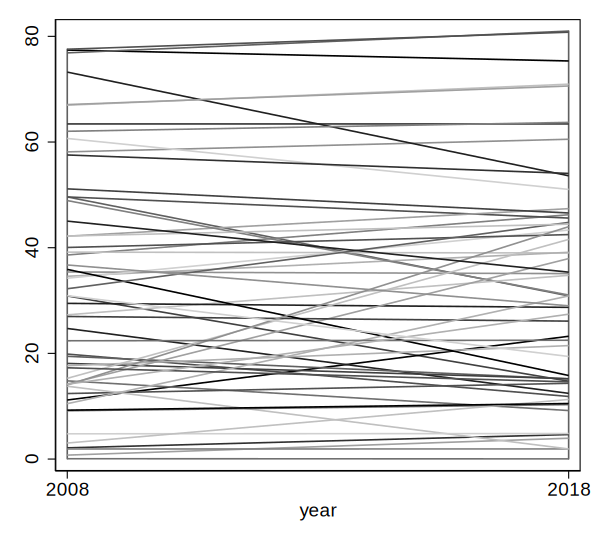

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            

. qui restore


In [6]:
qui {
preserve
    keep year country tech_exp
    separate tech_exp, by(country) veryshortlabel 
    sort year
    }
    de
    line tech_exp* year, xlabel(2008 2018) ysize(5) leg(off)
qui restore

In [12]:
ssc install egenmore

checking egenmore consistency and verifying not already installed...
all files already exist and are up to date.


In [16]:
drop mean_tech_ex
bysort year: egen mean_tech_ex = mean(tech_exp) if _n == 1



(108 missing values generated)


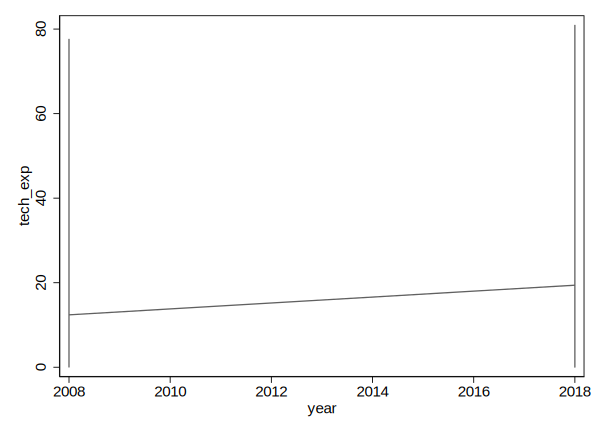

In [17]:
line tech_exp year